In [19]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = kagglehub.dataset_download("bhadramohit/customer-shopping-latest-trends-dataset")
df = pd.read_csv('/kaggle/input/customer-shopping-latest-trends-dataset/shopping_trends.csv')

With this data analysis we aim to analyze and describe the relationship between customer demographics and their shopping behaviour to uncover any hidden patterns.
* Do different age groups have varying purchasing frequencies or average transaction values?
* Are certain payment methods more common among specific genders or age groups?
* Is there a correlation between loyalty status and spending behavior?

Firstly we start with some data exploration and visualisation.

In [20]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


One can observe the 19 different columns in this data set which represent data about: Transaction details, Customer information and Shopping behavior.

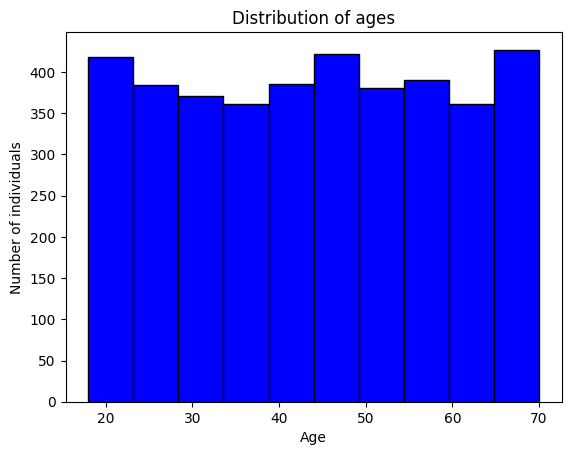

In [21]:
age_distribution = df['Age'].hist(grid=False,color='blue',edgecolor='black')
age_distribution.set_xlabel('Age');
age_distribution.set_ylabel('Number of individuals');
plt.title('Distribution of ages');

This dataset includes customers aged 18 to 70 with a more balanced distribution observed between the ages of 40 and 60.

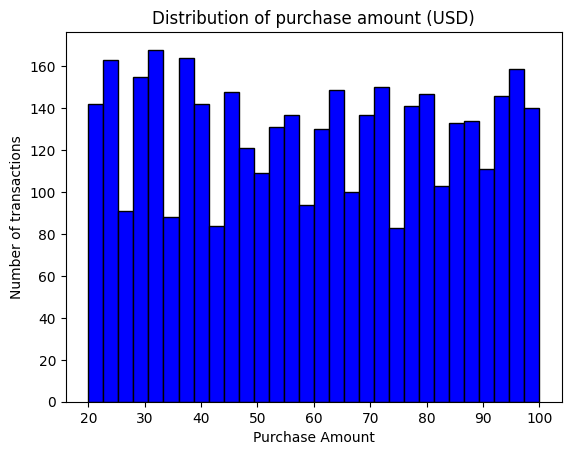

In [22]:
purchase_amount = df['Purchase Amount (USD)'].hist(grid=False,color='blue',edgecolor='black',bins=30)
purchase_amount.set_xlabel('Purchase Amount');
purchase_amount.set_ylabel('Number of transactions');
purchase_amount.set_title('Distribution of purchase amount (USD)');


The distribution shows noticeable fluctuations with certain purchase amounts ocurring more frequently than others. This could be due to bundled discounts,promotions on specific items, or customer preferences for certain price ranges. This pattern might indicate that customers tend to spend within specific price ranges, possibly influenced by pricing strategies or customer demographics.

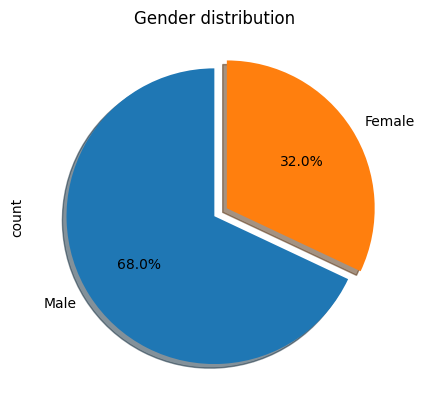

In [23]:
gender_chart = df['Gender'].value_counts().plot.pie(title='Gender distribution',shadow=True,startangle=90,explode=(0,0.1),autopct='%1.1f%%');

The pie chart shows that 68% customers are male while the remaining 32% are female. This shows a significant gender imbalance in the dataset.


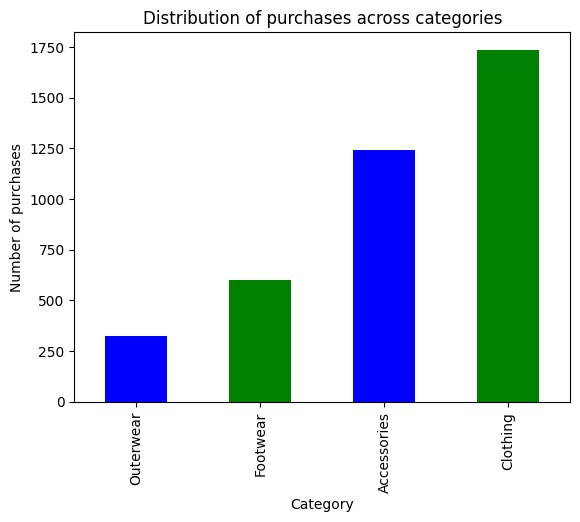

In [24]:
category_chart = df['Category'].value_counts().sort_values(ascending=True).plot.bar(color=['blue','green'],)
category_chart.set_ylabel('Number of purchases');
category_chart.set_title('Distribution of purchases across categories');

This bar chart furter shows the distribution of transactions accross different product categories, with the majority of purchases in clothing and accessories. This suggests that the dataset focuses on apparel-related purchases.

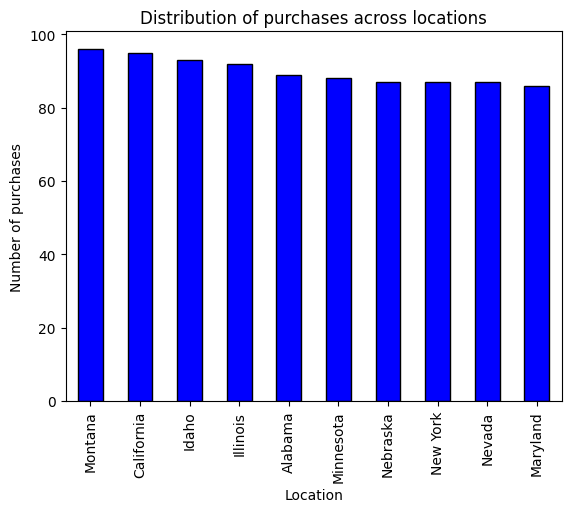

In [25]:
location_top10 = df['Location'].value_counts().sort_values(ascending=False).head(10) # Gets the first 10 locations by number of purchases
location_chart = location_top10.plot.bar(color='blue',edgecolor='black');
location_chart.set_ylabel('Number of purchases');
location_chart.set_title('Distribution of purchases across locations');

The bar chart highlights the top 10 locations with the highest number of purchases, Montana leading as being the most prominent source of transactions.

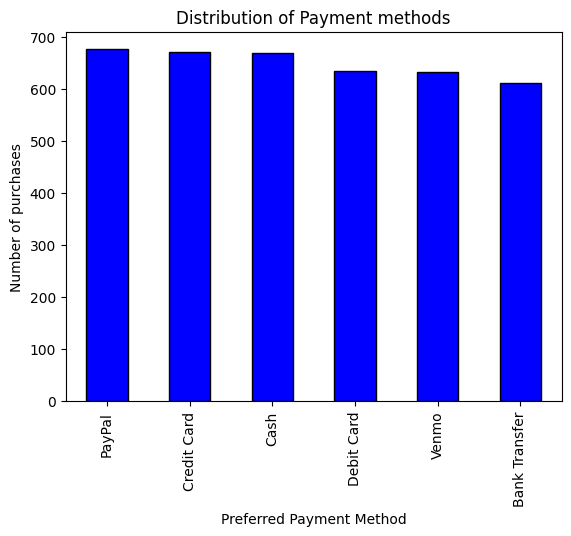

In [26]:
payment_methods = df['Preferred Payment Method'].value_counts().sort_values(ascending=False)
payment_methods_chart = payment_methods.plot.bar(color='blue',edgecolor='black',title='Distribution of Payment methods');
payment_methods_chart.set_ylabel('Number of purchases');

Payment methods are fairly distributed, with virtual options such as paypal and credit cards being the most commonly used, followed by cash as the third most popular choice.

With a basic understanding of the dataset established, we can now proceed to analyze the data and address the questions posed. Our first focus will be on answering

* Do different age groups have varying purchasing frequencies or average transaction values?

We will first start grouping our data in different age groups (bins):
* 18-24 (Young Adults)
* 25-34 (Early Career)
* 35-44 (Mid Career)
* 45-54 (Late Career)
* 55-64 (Pre Retirement)
* 65-70 (Retirement)

This way of grouping makes sure we can easily interpret shopping behaviours. We also have the information that the ages range from 18 to 70 years old.

In [27]:
df['Age Group'] = pd.cut(x=df['Age'], bins=[0, 24, 34, 44, 54, 64, 70], labels=['Young Adults','Early Career','Mid Career','Late Career','Pre Retirement','Retirement'])
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age Group
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,Pre Retirement
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,Young Adults
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Late Career
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,Young Adults
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,Late Career


We first add a new column called "Age group", which assigns age groups to every customer.

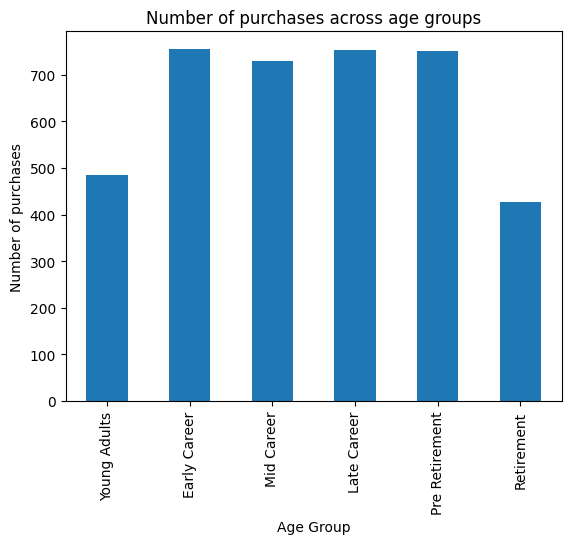

In [28]:
age_group_transaction = df.groupby('Age Group',observed=False).size()
age_group_transaction.plot.bar(title='Number of purchases across age groups');
plt.ylabel("Number of purchases");


This graph offers a clear view of purchasing behaviours across different age groups. We can see a fairly balanced distribution among Early Career to Pre Retirement customers, while Young Adults and retired customers show lower purchase frequencies. This could be attributed to different factors-young adults probably priorities other expenses or have limited income while retired customers might be less engaged in purchasing compared to younger, more active age groups.

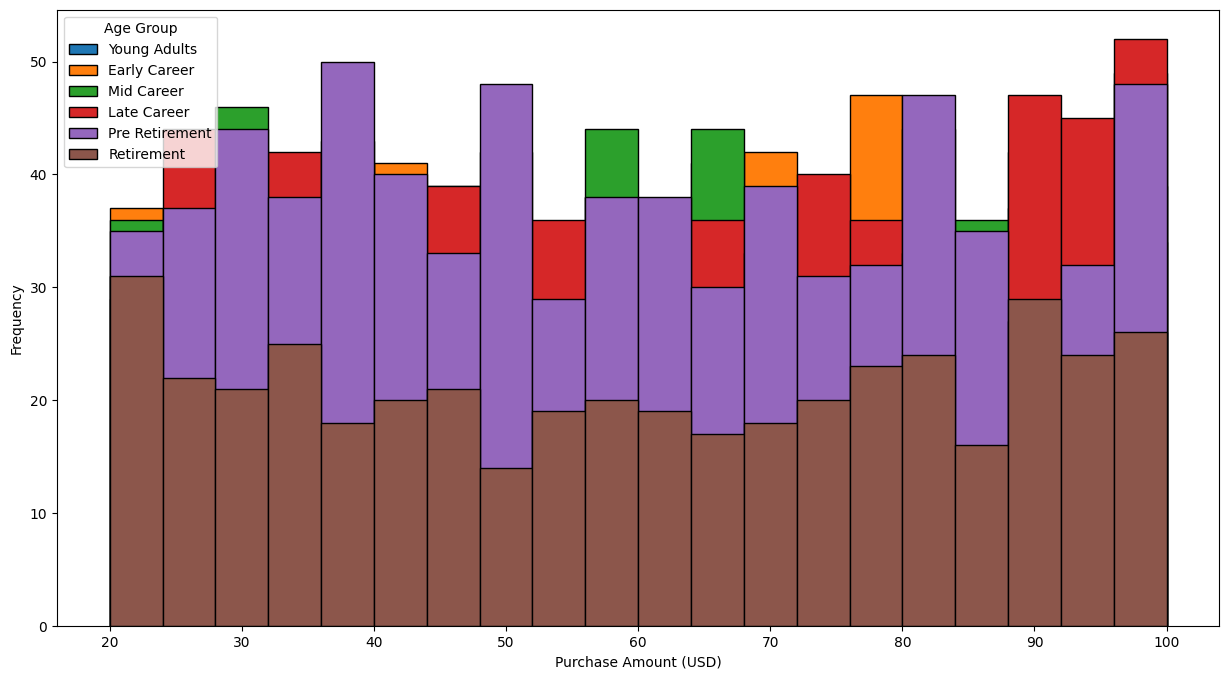

In [29]:
df.groupby('Age Group',observed=False)['Purchase Amount (USD)'].plot.hist(bins=20, alpha=1, edgecolor='black', figsize=(15, 8))
plt.xlabel('Purchase Amount (USD)')
plt.legend(title='Age Group')
plt.show()

This plot provides a clearer insight into the common purchase amounts across different age groups. It is clear that retired individuals tend to spend less on average. In contrast, individuals in the Late Career and Pre-Retirement groups register higher spendings  , with their purchase amounts more widely distributed and tending towards the higher end. This could be attributed to their greater financial stability, disposable income, and potentially more established purchasing habits. The distribution of purchases for other age groups, such as Early Career and Young Adults, falls somewhere in between, with less consistent spending behavior.

In [30]:
average_purchase_amount = df.groupby('Age Group',observed=False)['Purchase Amount (USD)'].mean()
print(average_purchase_amount)

Age Group
Young Adults      60.201646
Early Career      60.132450
Mid Career        59.620027
Late Career       60.332447
Pre Retirement    58.716378
Retirement        59.704918
Name: Purchase Amount (USD), dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


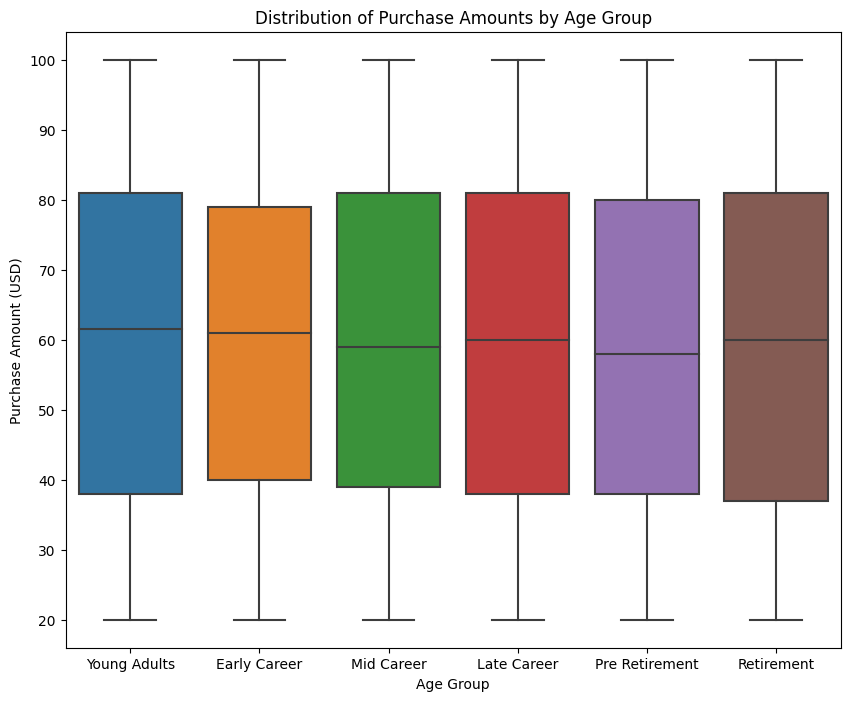

In [31]:
plt.figure(figsize=[10,8])
sns.boxplot(x=df['Age Group'], y=df['Purchase Amount (USD)'])
plt.title("Distribution of Purchase Amounts by Age Group")
plt.show()

At first, having the average purchase amount this close was strange given the fact that retired customer's data show that they spend significantly lower money. The boxplot show that the mean is giving correct values. However we will investigate further to make sure that this applies.

In [32]:
median_purchase_amount = df.groupby("Age Group",observed=False)['Purchase Amount (USD)'].median()
print(median_purchase_amount)

Age Group
Young Adults      61.5
Early Career      61.0
Mid Career        59.0
Late Career       60.0
Pre Retirement    58.0
Retirement        60.0
Name: Purchase Amount (USD), dtype: float64


The median gives us a better understanding of our data because it is less sensitive to outlier values compared to the mean. This suggests that every age group spends on average the same amount of money.

Different age groups have different purchasing frequencies. This is because each group has different interests and financial situations. People aged 25-64 tend to buy more often since they likely have more money to spend and have developed regular shopping habits. Young adults, however, may focus on other priorities like saving for a car or apartment, so they buy less. Retired people also tend to shop less, possibly because they are less interested in shopping compared to younger groups.

Even though the purchasing frequencies vary, the average transaction values are quite similar across age groups. This suggests that there are common popular items that people of all ages tend to buy.

Now we can move on to the second question we wish to answer
 * Are certain payment methods more common among specific genders or age groups?

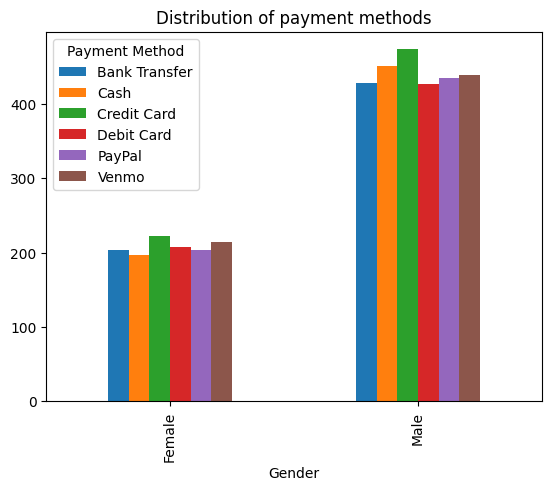

In [33]:
payment_gender_counts = df.groupby(['Gender', 'Payment Method']).size().unstack()
payment_gender_counts.plot.bar(title='Distribution of payment methods');


We can see that the preferred payment methods are similar across both genders. However, if the dataset had more data for female customers, we would likely observe a distribution closer to the payment method preferences of male customers.
We will now like to analyize further and check wether different age groups have different preferred payment methods

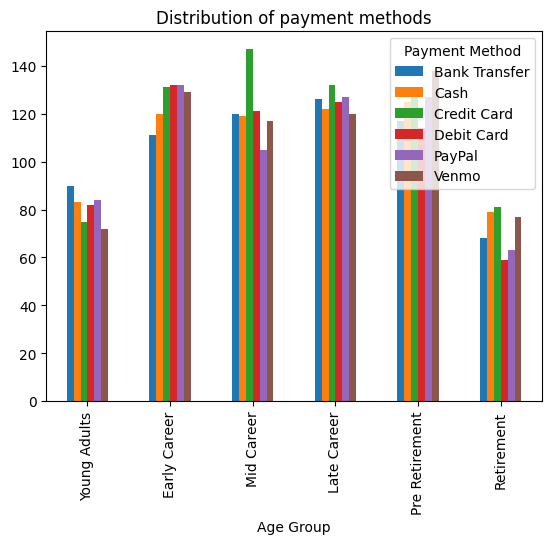

In [34]:
payment_age_group_counts = df.groupby(['Age Group','Payment Method'],observed=False).size().unstack()
payment_age_group_counts.plot.bar(title='Distribution of payment methods');

Analysing by age groups reveals a preference in using credits cards but identifying trends for other payments is more challenging. Let's dive deeper!

In [35]:
payment_counts = df.groupby(['Age Group', 'Payment Method'],observed=False).size().unstack()
payment_counts.loc['Total'] = payment_counts.sum(axis=0)
print(payment_counts)

Payment Method  Bank Transfer  Cash  Credit Card  Debit Card  PayPal  Venmo
Age Group                                                                  
Young Adults               90    83           75          82      84     72
Early Career              111   120          131         132     132    129
Mid Career                120   119          147         121     105    117
Late Career               126   122          132         125     127    120
Pre Retirement            117   125          130         114     127    138
Retirement                 68    79           81          59      63     77
Total                     632   648          696         633     638    653


With the payment methods data broken down by age groups, we can observe small differences in the preferred methods, but the overall distribution remains balanced across all groups. Credit cards are the most commonly used payment method, followed by PayPal, with cash payments being less frequent across the board.

This suggests that while there are some variations in payment preferences between age groups, the overall trend indicates that modern, digital payment methods like credit cards and PayPal dominate. Cash payments appear to be less favored in general, which aligns with the broader trend of increasing digital payment adoption across all age groups.

We can now answer our third question:
* Is there a correlation between subscription status and spending behavior?


Spending behavior can be defined by total spending, amount per transaction or frequency of purchases. We will use frequency of purchase to describe spending behavior.

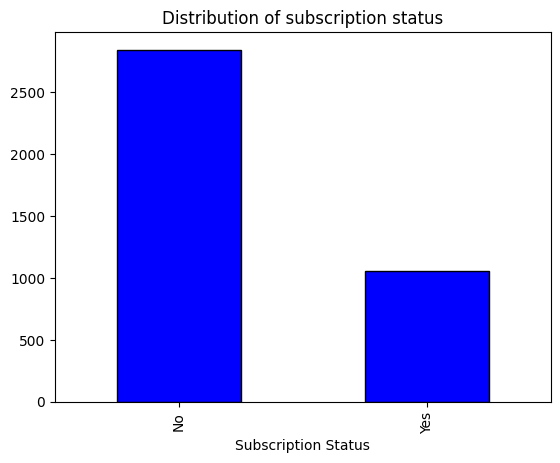

In [36]:
subscription_customers = df.groupby('Subscription Status').size()
subscription_customers.plot.bar(title='Distribution of subscription status',color='blue',edgecolor='black');

As we can observe from our plot, only a small proportion of people have a subscription. Now we can analyze purchase frequencies in these 2 categories.

In [37]:
purchase_frequency = df.groupby('Subscription Status')['Purchase Amount (USD)'].count()
print(purchase_frequency)

Subscription Status
No     2847
Yes    1053
Name: Purchase Amount (USD), dtype: int64


This analysis shows that although there are fewer subscribers, they account for a significant portion of the total purchases. This suggests that subscribers tend to make more frequent or higher-value purchases compared to non-subscribers, even though the non-subscriber group is larger. It would be beneficial to know whether the high spending from subscribers is due to subscription benefits, loyalty, or other factors that encourage frequent purchases.


In this exploratory data analysis, we examined various aspects of customer demographics and shopping behavior to uncover potential patterns and insights.

    Age Group and Purchasing Behavior: We observed varying purchasing frequencies across different age groups. Customers in the "Early Career" to "Pre-Retirement" age groups (25-64) made the most frequent purchases, likely due to having more disposable income and established purchasing habits. On the opposite hand, younger adults and retired individuals showed lower purchasing frequencies, with young adults prioritizing other financial goals and retired individuals perhaps less engaged in shopping. However, the average transaction values were relatively similar across age groups, suggesting that certain popular items are common to all demographics.

    Payment Methods and Demographics: The analysis of payment methods revealed that digital payment methods like credit cards and PayPal were preferred across most demographic groups, with cash payments being less frequent. Gender differences in payment preferences were minimal, but we observed small variations in preferences across age groups, with credit cards being the most commonly used payment method overall.

    Subscription Status and Spending Behavior: Although the number of subscribers was relatively small, they accounted for a significant portion of the total purchases. This suggests that subscribers tend to make more frequent or higher-value purchases than non-subscribers. Further analysis would be needed to understand whether this behavior is driven by subscription benefits, loyalty programs, or other factors.


Thank you for reading until the end ! :D